# Clustering

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster.elbow import KElbowVisualizer 
from yellowbrick.cluster import silhouette_visualizer, intercluster_distance 

# Visualization
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.templates.default = "seaborn"

In [2]:
df_players = pd.read_csv("./datasets/players.csv", index_col=0)
#df_players = df_players[df_players.gender == "f"]

## Features preparation

In [3]:
feautures = ['lrpOnMxrp', 'matches_won_ratio', 'mean_rank_points', 'variance_rank_points', 'max_tourney_revenue']
#feautures = ['lrpOnAvgrp', 'lrpOnMxrp', 'variance_rank_points', 'max_tourney_revenue'] # Sil:  0.5278228177769032
#['lrpOnAvgrp', 'lrpOnMxrp', 'matches_won_ratio', 'mean_rank_points', 'variance_rank_points', 'mean_tourney_spectators', 'max_tourney_revenue', 'rel_ptsWon']
#['lrpOnAvgrp', 'lrpOnMxrp', 'variance_rank_points', 'max_tourney_revenue']
#['matches_won_ratio', 'mean_rank_points', 'mean_tourney_spectators', 'mean_tourney_revenue'] -> Siluette score

for feature in feautures:
    df_players[feature].hist().show()

### Transformations

In [23]:
df_players['mean_rank_points'] = np.log(df_players['mean_rank_points'])
df_players['variance_rank_points'] = np.log1p(df_players['variance_rank_points'])

df_players['mean_rank_points'].hist().show()
df_players['variance_rank_points'].hist().show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



### Normalization

In [6]:
df_data = df_players[feautures].reset_index(drop=True)
df_data = pd.DataFrame(MinMaxScaler().fit_transform(df_data), columns=df_data.columns)
#df_data = pd.DataFrame(RobustScaler(unit_variance=True).fit_transform(df_data), columns=df_data.columns)
#df_data = df_data[(np.abs(stats.zscore(df_data)) < 2).all(axis=1)]
#df_data = pd.DataFrame(QuantileTransformer().fit_transform(df_data), columns=df_data.columns)
df_data = df_data.round(3)

df_data.boxplot(column=feautures)

## PCA

In [37]:
# # PCA
# pca = PCA(n_components=2)
# components = pca.fit_transform(df_data)
# components_df = pd.DataFrame(components)

# # Cluster on PCA
# model = KMeans()
# sse_visualizer = KElbowVisualizer(model, k=(2,8), timings=False)
# sse_visualizer.fit(PCA_components.iloc[:,:3])

# kmeans = KMeans(n_clusters=sse_visualizer.elbow_value_, n_init=10, max_iter=100, init="k-means++")
# kmeans.fit(PCA_components.iloc[:,:3])

# px.bar(x=range(pca.n_components), y=pca.explained_variance_ratio_, title="Explained variances").show()
# px.scatter(x=PCA_components[0], y=PCA_components[1], color=kmeans.labels_.astype(str))

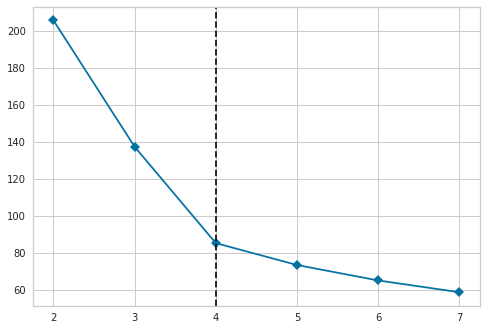

In [35]:
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(df_data)
components_df = pd.DataFrame(components)

# Cluster on PCA
model = KMeans()
sse_visualizer = KElbowVisualizer(model, k=(2,8), timings=False)
sse_visualizer.fit(PCA_components.iloc[:,:4])

kmeans = KMeans(n_clusters=sse_visualizer.elbow_value_, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(PCA_components.iloc[:,:4])

px.bar(x=range(pca.n_components), y=pca.explained_variance_ratio_, title="Explained variances").show()
px.scatter_3d(x=PCA_components[0], y=PCA_components[1], z=PCA_components[2], color=kmeans.labels_.astype(str))

## K-means

### Find Optimal K

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


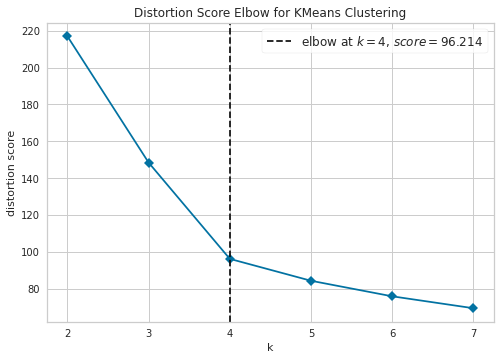

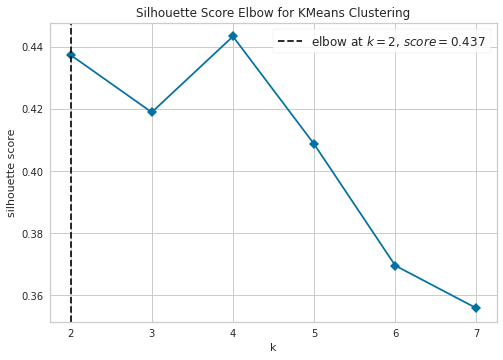

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [9]:
model = KMeans()
sse_visualizer = KElbowVisualizer(model, k=(2,8), timings=False)
sse_visualizer.fit(df_data)
sse_visualizer.show()

sil_visualizer = KElbowVisualizer(model, k=(2,8), timings=False, metric="silhouette")
sil_visualizer.fit(df_data)
sil_visualizer.show()

# calinski_visualizer = KElbowVisualizer(model, k=(2,8), metric='calinski_harabasz', timings=False)
# calinski_visualizer.fit(df_data)
# calinski_visualizer.show()

In [10]:
# sse_scores = list()
# silhoutte_scores = list()
# davies_scores = list()
# calinski_harabasz_scores = list()

# max_k = 30
# for k in range(2, max_k + 1):
#     kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, init="k-means++")
#     kmeans.fit(df_data)    
    
#     # Sum of squared distances of samples to their closest cluster center
#     sse_scores.append(kmeans.inertia_)
#     davies_scores.append(davies_bouldin_score(df_data, kmeans.labels_))
#     silhoutte_scores.append(silhouette_score(df_data, kmeans.labels_))
#     calinski_harabasz_scores.append(calinski_harabasz_score(df_data, kmeans.labels_))

# df = pd.DataFrame({"K": list(range(2, max_k + 1)), "sse": sse_scores, "sil": silhoutte_scores, "davies": davies_scores, "calinski": calinski_harabasz_scores})
# df.plot(x="K", y=["sse"], kind="line").update_traces(mode='lines+markers').show()
# df.plot(x="K", y=["calinski"], kind="line").update_traces(mode='lines+markers').show()
# df.plot(x="K", y=["sil", "davies"], kind="line").update_traces(mode='lines+markers').show()


In [11]:
optimal_k = sse_visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_data)

df_players["cluster"] = kmeans.labels_.astype(str)
df_players = df_players.round(3)

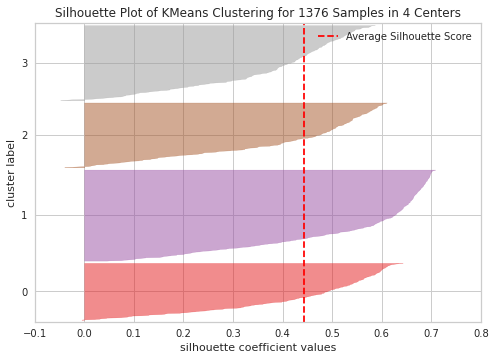

The silhoutte score is: 0.442909050725638


In [12]:
x = silhouette_visualizer(KMeans(optimal_k, random_state=42), df_data)
print("The silhoutte score is: " + str(x.silhouette_score_))

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


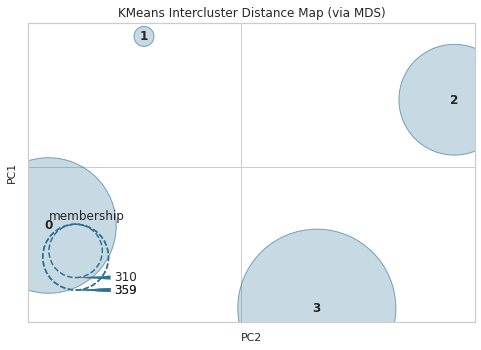

dict_keys(['ax', 'embedding', 'estimator', 'is_fitted', 'legend', 'legend_loc', 'legend_size', 'max_size', 'min_size', 'random_state', 'scoring']) 


dict_keys(['ax', 'embedding', 'estimator', 'is_fitted', 'legend', 'legend_loc', 'legend_size', 'max_size', 'min_size', 'random_state', 'scoring']) 




InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(max_iter=100, n_clusters=4))

In [13]:
intercluster_distance(kmeans, df_data)

### Result analysis

#### Cluster distribution

In [15]:
df_players.groupby("cluster").count()["name"].plot.bar()

#### Interpretatation

In [16]:
pd.set_option('display.max_columns', None)
df_players.groupby("cluster").mean()

,total_tourneys_played,total_matches_played,total_matches_won,matches_won_ratio,mean_performance_index,max_performance_index,min_performance_index,ht,age,mean_minutes,max_minutes,minutes_entropy,mean_rank_points,max_rank_points,last_rank_points,variance_rank_points,mean_tourney_spectators,max_tourney_spectators,mean_tourney_revenue,max_tourney_revenue,rel_ace,rel_df,rel_1stIn,rel_1stWon,rel_2ndWon,1WonOn1In,1WonOnTotWon,rel_ptsWon,rel_bpFaced,rel_bpSaved,rel_gmsWon,lrpOnAvgrp,lrpOnMxrp
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,91.403900,190.025070,100.768802,0.520724,0.296708,0.827992,0.000000,181.042105,25.821028,96.922621,200.910864,4.707538,6.098318,1306.253482,408.473538,10.385914,5085.758131,16600.621170,1.015109e+06,4.299627e+06,0.054535,0.047298,0.613240,0.409552,0.184148,0.669365,0.689947,0.498733,0.051883,0.545022,0.510214,0.594390,0.325097
1,31.345588,56.496324,24.988971,0.414125,0.218015,0.578136,0.000000,183.833333,24.652449,90.530029,169.169118,3.560228,4.204011,150.966912,33.970588,6.704555,3564.730349,8122.411765,7.086724e+05,1.605133e+06,0.057669,0.050246,0.602651,0.404129,0.188544,0.671908,0.681743,0.492096,0.053125,0.539949,0.475588,0.394346,0.234460
2,31.883871,60.022581,28.196774,0.426248,0.224323,0.568865,0.000539,186.250000,21.981613,92.728813,166.974194,3.531110,4.002355,126.467665,104.906155,6.218600,3985.071190,8131.619355,7.915675e+05,1.728521e+06,0.050319,0.046697,0.606294,0.401994,0.187655,0.664106,0.681606,0.491645,0.053145,0.534639,0.476023,1.459045,0.846768
3,105.363218,234.763218,133.121839,0.563425,0.337497,0.871303,0.000000,180.902564,21.499862,99.186308,206.036782,4.811366,5.967639,1243.933333,1093.406897,10.361395,4971.961922,17072.586207,1.000883e+06,4.835201e+06,0.051333,0.046402,0.618138,0.410846,0.183347,0.666398,0.691864,0.501993,0.051756,0.548322,0.525756,1.873589,0.886989


In [17]:
print(f'Most frequent values per cluster')
out_dict = {}
for cluster in range(0, optimal_k):
    temp_df = df_players.groupby(by='cluster').get_group(str(cluster))
    temp_dict = {}

    for col in temp_df.columns:
        temp_dict[col] = temp_df[col].value_counts().idxmax()
    out_dict[cluster] = temp_dict

pd.DataFrame(out_dict)

Most frequent values per cluster


,0,1,2,3
name,anastasija sevastova,gabor borsos,alexander erler,goncalo oliveira
gender,m,m,m,m
total_tourneys_played,116,15,13,63
total_matches_played,280,29,16,272
total_matches_won,75.0,9.0,11.0,128.0
matches_won_ratio,0.536,0.5,0.5,0.582
mean_performance_index,0.314,0.227,0.167,0.33
max_performance_index,0.833,0.5,0.833,0.833
min_performance_index,0.0,0.0,0.0,0.0
ht,185.0,183.0,190.0,183.0


In [18]:
px.scatter_matrix(df_players,
    dimensions=feautures,
    color="cluster")

In [19]:
for feature in df_players.columns.drop(["name"]).to_list():
  px.histogram(df_players, x=feature, facet_col="cluster", color=df_players.gender).show()

## Density-based

## Hierarchical

## Optional

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=56da3ab5-e195-41aa-a609-f5fefeb3379d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>